In [1]:
from PIL import Image
from numpy import array
import numpy as np
import key
import analysis
import random

# Loading the image
img = Image.open('Lena.png')
# making an array of the original image
original_image_array = array(img)
height, width = original_image_array.shape


# Initialize the final image
final_img = np.zeros((1024, 1024), dtype=np.uint8)
padded_image = np.zeros((1024, 1024), dtype=np.uint8)

# First subblock
# padded_image[:512, :512] = original_image_array

# Center the image
center_x = int((1024 - original_image_array.shape[0]) / 2)
center_y = int((1024 - original_image_array.shape[1]) / 2)
padded_image[center_x:center_x+original_image_array.shape[0], center_y:center_y+original_image_array.shape[1]] = original_image_array


In [2]:

# Creating k1 and k2 the inital conditions for latin square
k1, x = key.coordinate_generator(1, 1024)
k2, x = key.coordinate_generator(1, 1024, x)
# Crearting the keyt to xor
key3 = key.key_gen(1024, 1024, x)
# Creating the latin square using left shift and right shift
key1 = np.empty((0, 1024), dtype=int)
key2 = np.empty((0, 1024), dtype=int)

In [3]:
def key1_generator(key1, k1):
    for i in range(1024):
        shifted_arr = np.roll(k1, i, axis=1)
        key1 = np.vstack((key1, shifted_arr))
    return key1


def key2_generator(key2, k2):
    for i in range(1024):
        shifted_arr = np.roll(k2, -i, axis=1)
        key2 = np.vstack((key2, shifted_arr))
    return key2

In [4]:
def chaotic_shuffle(image,final_img, key1, key2, key3):
    # Chaotic shuffle and xor the final key
    for i in range(1024):
        for j in range(1024):
            if (key1[i, j] < 512) and (key2[i, j] < 512):
                final_img[i, j] = image[key1[i, j], key2[i, j]]
    final_img = key.keyxor(final_img, key3)
    return final_img


In [5]:
def applyhenon(matrix):
    for i in range(0, 1024, 512):
        for j in range(0, 1024, 512):
            submatrix = matrix[i:i+512, j:j+512]
            submatrix = key.henon(submatrix)
            matrix[i:i+512, j:j+512] = submatrix
    return matrix

In [6]:
key1 = key1_generator(key1, k1)
key2 = key2_generator(key2, k2)

In [12]:
final_img = chaotic_shuffle(original_image_array,final_img, key1, key2, key3)
final_img = applyhenon(final_img)

In [8]:
display(final_img)

array([[198, 178, 215, ..., 162, 236, 219],
       [ 86, 166, 231, ..., 251, 150,  55],
       [171, 224, 108, ..., 197, 208,   4],
       ...,
       [ 65, 193, 143, ..., 159, 239,  60],
       [183,  31, 157, ...,  54,  11,  41],
       [138, 253, 163, ..., 252,  10,  39]], dtype=uint8)

In [9]:
img2 = np.copy(original_image_array)
x = random.randint(0, 511)
y = random.randint(0, 511)
img2[x][y] = random.randint(0, 255)
print(img2[x,y])
final_img2 = np.zeros((1024, 1024), dtype=np.uint8)
final_img2 = chaotic_shuffle(img2,final_img2, key1, key2, key3)
final_img2 = applyhenon(final_img2)

203


CC:  0.007270600760588345


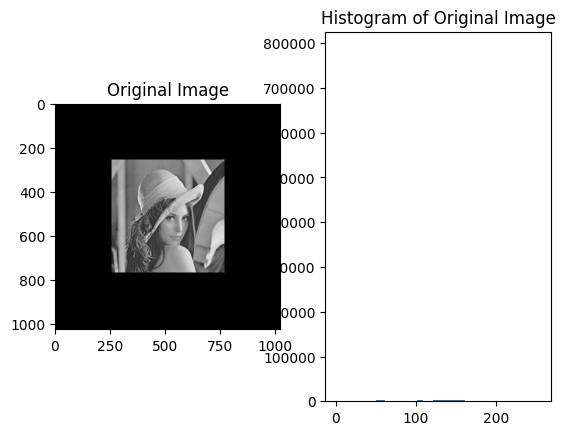

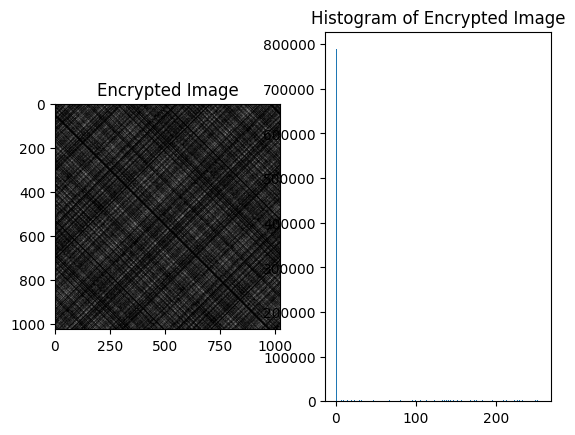

npcr:  74.78351593017578 %	Uaci:  37.73152145684934 %
Entropy 2.658969784175723
Entropy 2.648249345535146


In [14]:

# analysis
print("CC: ", analysis.correlation_coefficient(padded_image, final_img))
analysis.histogram(padded_image, final_img)
npcr, uaci = analysis.NPCR_UACI_worker(final_img, final_img2)
print("npcr: ", npcr, "%\tUaci: ", uaci, "%")
print("Entropy", analysis.entropy(final_img))
print("Entropy", analysis.entropy(padded_image))

In [11]:
k = Image.fromarray(final_img)
k.save('./pics/final1903.png')
k2 = Image.fromarray(final_img2)
k2.save('./pics/final19032.png')